# The Best Neighborhood

Group Members: Sean Linton, Tyree Spencer, Mercedes Sanoja Suarez

## Introduction

For our project, we didn't want to be like every other group in this class. We wanted to be unique. Instead of using serious metrics, we chose silly ones that in our humble and all-knowing opinions mark the bestest city in the tri-state area. While perusing the WPDRC data, we stumbled open an oldie but a goldie: boomers. The dataset presented a broad range of data on different neighborhoods, but we decided to narrow it down to the population of boomers. We don't like boomers so the bestest city would be the one with the least amount of boomers. Then we got to thinking about something that would be funny and low and behold we found the one: illegal dump sites. Of course the bestest city would be the one with the most illegal dump sites because being legal is no fun. Lastly, we decided that what was most important for human survival is oxygen. That is why we chose the amount of trees as our third dataset.

## Metrics

BOOMERS
- We found the number of people in a certain age group, and found the areas with the lowest concentration. We decided that the best neighborhood would be the one with the lowest percentage of the Baby Boomer generation in the population.

ILLEGAL DUMPSITES
- We found the areas with the most amount of tonnage of illegal garbage, and determined these areas to be the "best" for living in.

TREES
- We used the number of trees in each neighborhood as our metric to determine which one was best and determined neighborhoods with more trees were better suited to live in.

## The Best Neighborhood

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

First we will take a look at the boomer population metric. 

In [2]:
boomerDataFrame = pd.read_csv("snap.csv")
boomerDataFrame.head(5)

OBJECTID  Neighborhood_2010_FID_BlockG  Neighborhood_2010_STATEFP10  \
0         1                             0                           42   
1         2                             1                           42   
2         3                             2                           42   
3         4                             3                           42   
4         5                             5                           42   

   Neighborhood_2010_COUNTYFP10  Neighborhood_2010_TRACTCE10  \
0                             3                        40500   
1                             3                        40400   
2                             3                        40200   
3                             3                        30500   
4                             3                        20300   

   Neighborhood_2010_BLKGRPCE10  Neighborhood_2010_GEOID10  \
0                             1               420030405001   
1                             1               420030404001   
2                             2               420030402002   
3                             2               420030305002   
4                             1               420030203001   

  Neighborhood_2010_NAMELSAD10 Neighborhood_2010_MTFCC10  \
0                Block Group 1                     G5030   
1                Block Group 1                     G5030   
2                Block Group 2                     G5030   
3                Block Group 2                     G5030   
4                Block Group 1                     G5030   

  Neighborhood_2010_FUNCSTAT10               ...                 \
0                            S               ...                  
1                            S               ...                  
2                            S               ...                  
3                            S               ...                  
4                            S               ...                  

   Total_Working_Pop___Age_16____2  SNAP_All_csv_Commute_to_Work__D  \
0                             2509                            16.3%   
1                             3436                            20.6%   
2                              834                            35.5%   
3                              635                            65.4%   
4                              277                            53.8%   

   SNAP_All_csv_Commute_to_Work__C  SNAP_All_csv_Commute_to_Work__P  \
0                             6.9%                            13.3%   
1                             7.2%                            11.5%   
2                             1.0%                            22.1%   
3                             9.6%                            16.5%   
4                            19.1%                            18.1%   

   SNAP_All_csv_Commute_to_Work__T  SNAP_All_csv_Commute_to_Work__M  \
0                             0.0%                             0.0%   
1                             0.4%                             0.0%   
2                             0.0%                             0.0%   
3                             2.0%                             0.0%   
4                             0.0%                             0.0%   

   SNAP_All_csv_Commute_to_Work__B  SNAP_All_csv_Commute_to_Work__W  \
0                             0.0%                            62.4%   
1                             2.9%                            52.6%   
2                             0.0%                            40.8%   
3                             0.0%                             6.5%   
4                             0.0%                             0.0%   

   SNAP_All_csv_Commute_to_Work__O  SNAP_All_csv_Work_at_Home__2010  
0                             0.0%                             1.2%  
1                             0.4%                             4.4%  
2                             0.7%                             0.0%  
3                             0.0%              

There is a lot of data here, each neighborhood has 190 columns related to it, but we are only interested in one.

In [3]:
hoodBoomerData = {}

for x in range(len(boomerDataFrame)):
    try:
        val = float(boomerDataFrame.loc[x, "F__Pop__Age_60_74__2010_"][:-1])
        if val != 0:
            hoodBoomerData[boomerDataFrame.loc[x, "Neighborhood_2010_HOOD"]] = val
    except:
        pass

print (hoodBoomerData)

{'Central Oakland': 3.82, 'North Oakland': 6.72, 'West Oakland': 8.06, 'Crawford-Roberts': 16.02, 'Strip District': 17.27, 'Central Business District': 14.46, 'Spring Hill-City View': 11.63, 'Perry South': 10.61, 'Summer Hill': 9.89, 'Northview Heights': 8.4, 'Perry North': 10.2, 'Westwood': 11.96, 'Beltzhoover': 12.97, 'Central Lawrenceville': 15.58, 'South Side Flats': 8.9, 'Allentown': 14.4, 'South Side Slopes': 9.51, 'Bluff': 3.5, 'Fineview': 16.35, 'Hazelwood': 14.41, 'Lincoln-Lemington-Belmar': 9.15, 'East Hills': 16.07, 'South Oakland': 11.7, 'Mount Washington': 11.95, 'Greenfield': 13.46, 'Squirrel Hill South': 10.34, 'Central Northside': 13.6, 'Spring Garden': 5.2, 'Troy Hill': 11.19, 'East Allegheny': 13.44, 'Stanton Heights': 13.53, 'Lower Lawrenceville': 7.67, 'Bloomfield': 12.56, 'Carrick': 12.37, 'Point Breeze': 11.77, 'Duquesne Heights': 19.27, 'Swisshelm Park': 15.46, 'Highland Park': 11.18, 'Garfield': 12.15, 'Manchester': 12.23, 'Upper Lawrenceville': 11.94, 'Beechvie

Since there is only one neighboorhood per row, it was easiest to create a separate dictionary with the names of the neighborhoods as the key, and the boomer population percentage as the value. It was necessary to check if the boomer population is 0% as that appears to be an error in the data set.

In [4]:
sortedBoomerHoods = sorted([x for x in hoodBoomerData], key = lambda y:hoodBoomerData[y], reverse = True)

for hood in sortedBoomerHoods:
    print (f"{hood}: {hoodBoomerData[hood]}%")

Chartiers City: 28.47%
West End: 26.72%
Bon Air: 22.75%
Middle Hill: 22.34%
Windgap: 21.31%
Homewood West: 20.04%
Duquesne Heights: 19.27%
Fairywood: 18.75%
Homewood South: 18.54%
New Homestead: 18.53%
Allegheny Center: 17.61%
Strip District: 17.27%
Bedford Dwellings: 16.96%
Fineview: 16.35%
East Hills: 16.07%
Crawford-Roberts: 16.02%
Central Lawrenceville: 15.58%
Regent Square: 15.57%
Swisshelm Park: 15.46%
Esplen: 14.89%
North Shore: 14.85%
Upper Hill: 14.56%
Central Business District: 14.46%
Hazelwood: 14.41%
Allentown: 14.4%
Point Breeze North: 14.23%
Oakwood: 13.74%
Central Northside: 13.6%
Hays: 13.58%
Stanton Heights: 13.53%
Greenfield: 13.46%
East Allegheny: 13.44%
Lincoln Place: 13.11%
Beltzhoover: 12.97%
Brookline: 12.63%
Bloomfield: 12.56%
Allegheny West: 12.55%
East Carnegie: 12.55%
Overbrook: 12.4%
Carrick: 12.37%
Morningside: 12.36%
Manchester: 12.23%
Glen Hazel: 12.19%
Garfield: 12.15%
Beechview: 12.03%
Westwood: 11.96%
Mount Washington: 11.95%
Upper Lawrenceville: 11.94

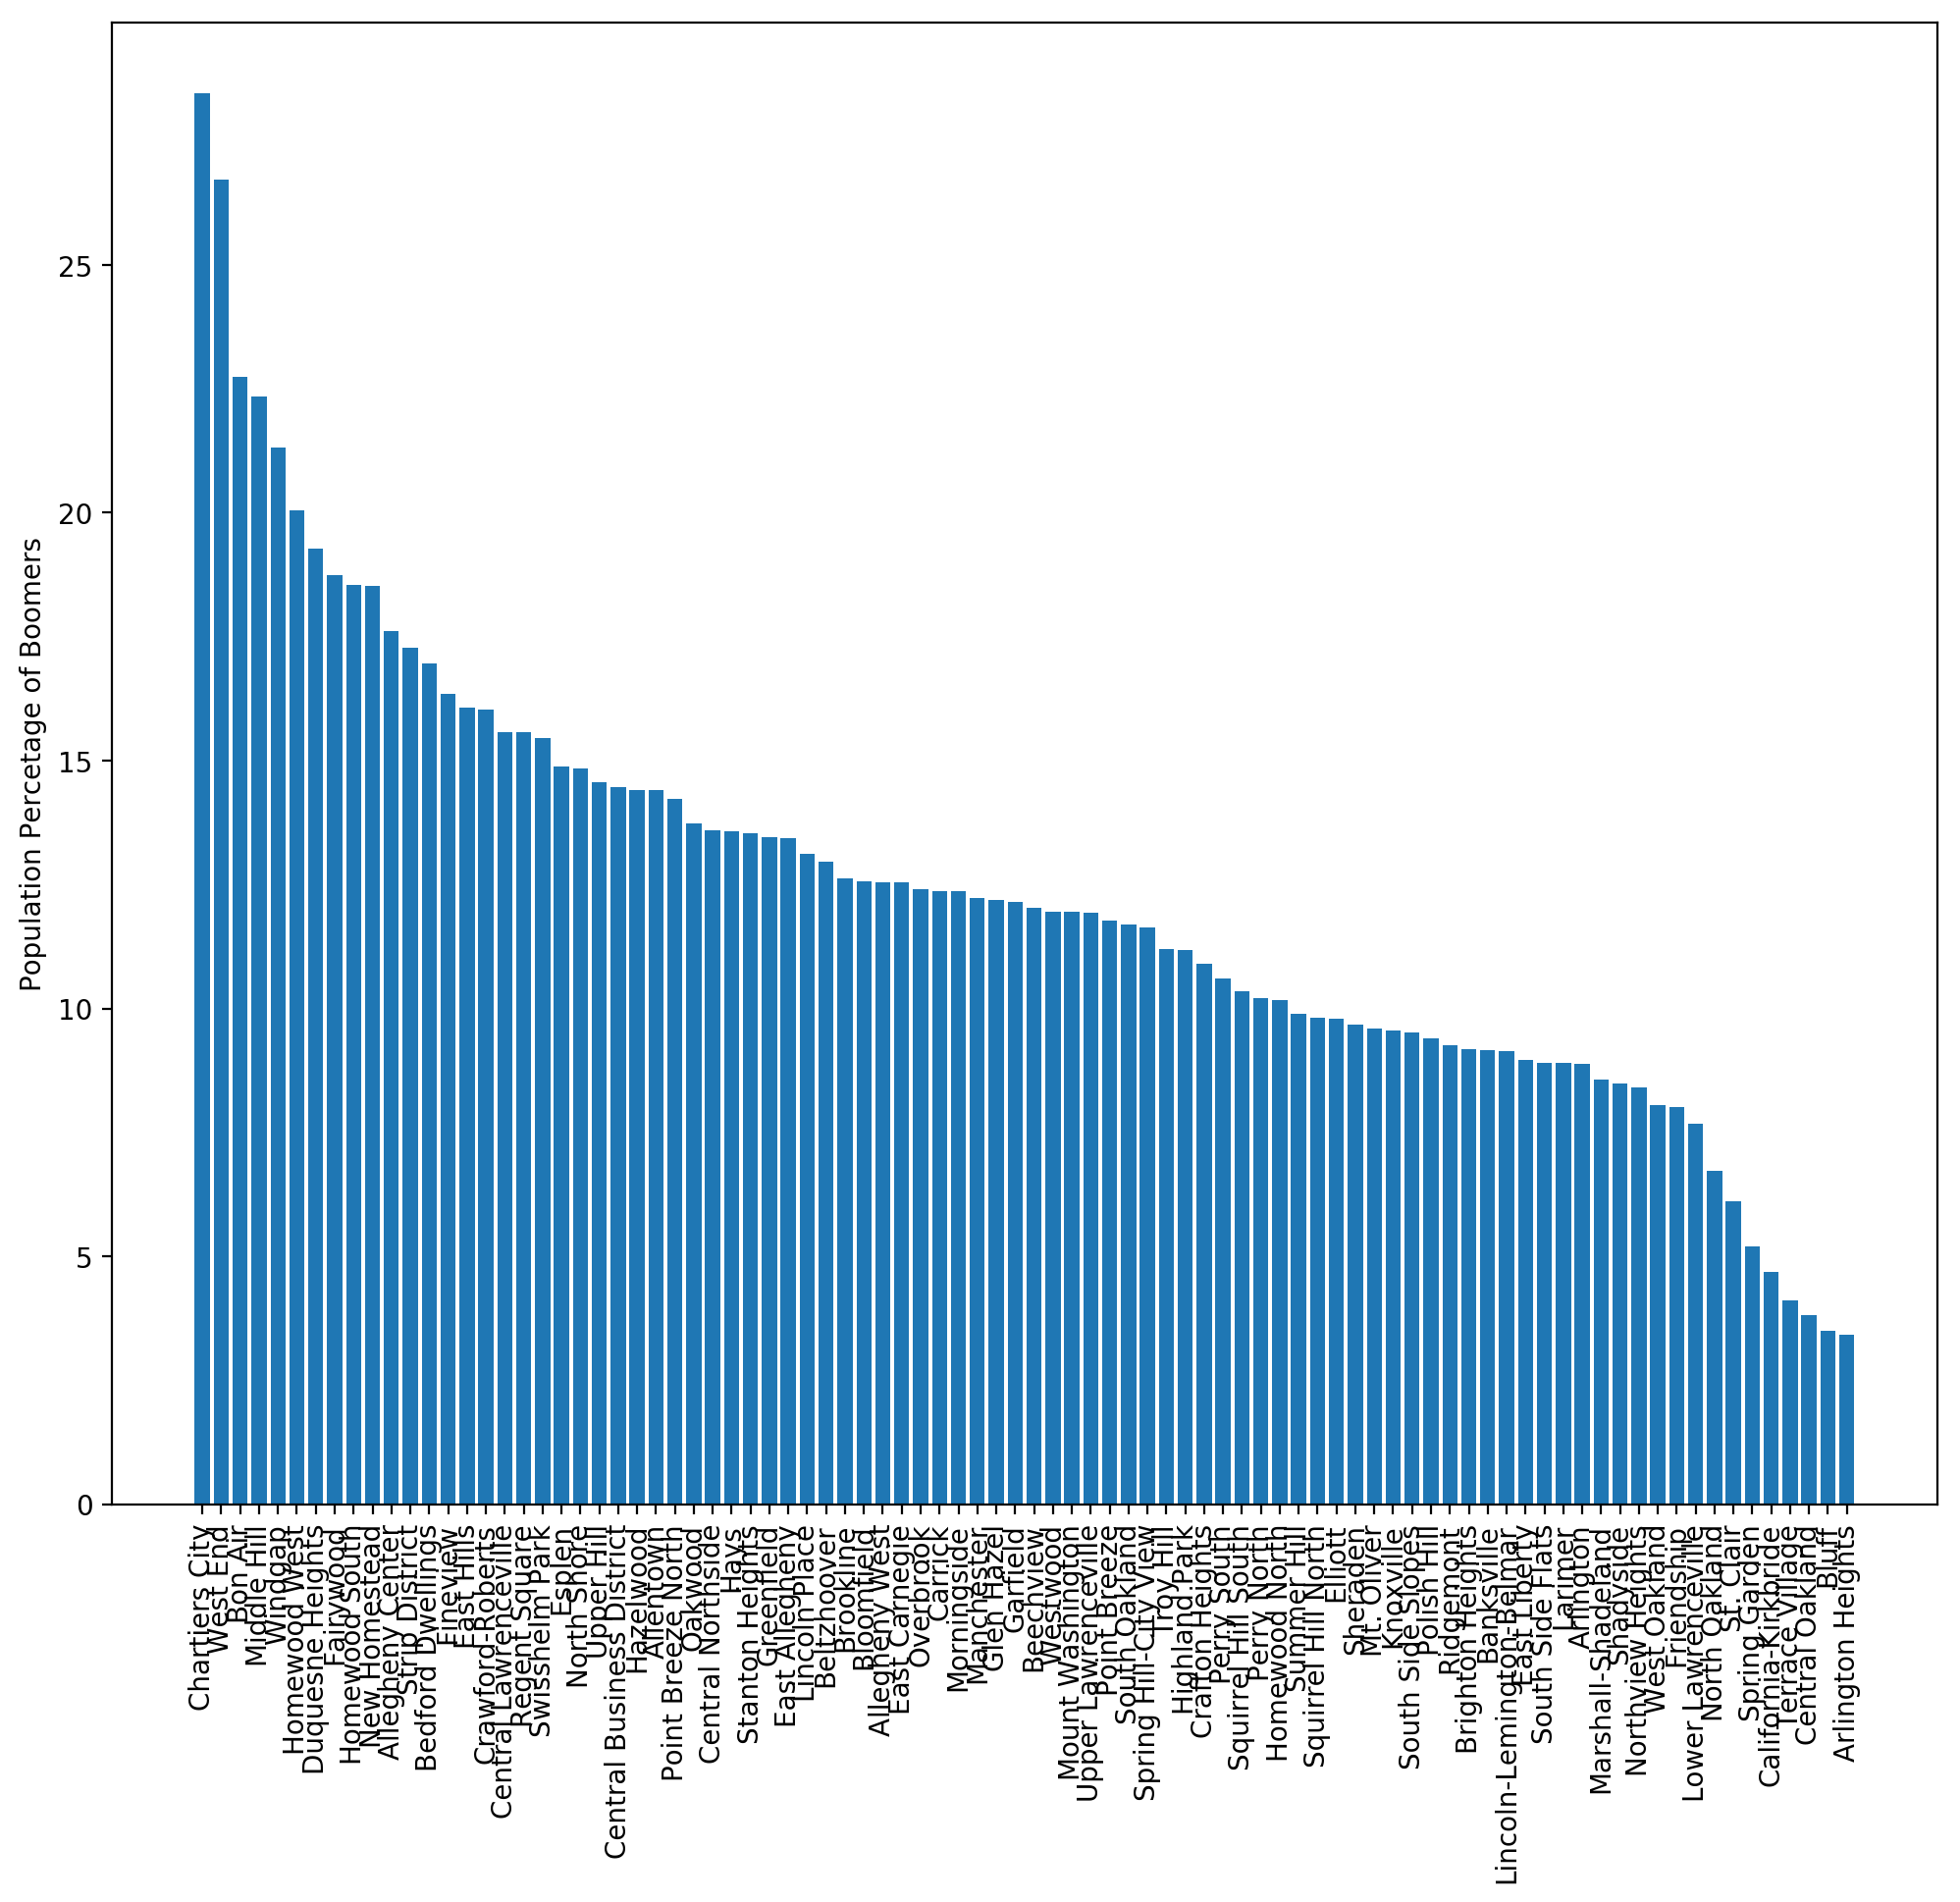

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(num=None, figsize=(12,10), dpi=200, facecolor='w', edgecolor='k')
plt.bar(sortedBoomerHoods, [hoodBoomerData[x] for x in sortedBoomerHoods])
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=90)
plt.ylabel("Population Percetage of Boomers")
plt.show()
plt.clf()

Here we get a good look at the distribution of the boomer population across all of the neighborhoods.

In [6]:
normHoodBoomerData = {}

maxBoomerVal = max([hoodBoomerData[x] for x in hoodBoomerData])
minBoomerVal = min([hoodBoomerData[x] for x in hoodBoomerData])

for hood in hoodBoomerData:
    normalized = 1 - ((hoodBoomerData[hood] - minBoomerVal) / (maxBoomerVal - minBoomerVal))
    normHoodBoomerData[hood] = normalized

To best compare the data, we decided to normalize each value between 0 and 1. This value is the boomer score given to each neighborhood. Since the best neighborhood is the one with the least amount of boomers, we inverted the value so that it is higher the lower the percentage.

In [7]:
for hood in sortedBoomerHoods[-10:][::-1]:
    print ("{}: {:.4f}".format(hood, normHoodBoomerData[hood]))

Arlington Heights: 1.0000
Bluff: 0.9964
Central Oakland: 0.9836
Terrace Village: 0.9717
California-Kirkbride: 0.9489
Spring Garden: 0.9286
St. Clair: 0.8923
North Oakland: 0.8679
Lower Lawrenceville: 0.8300
Friendship: 0.8160


Here are the top 10 neighborhoods with the highest boomer score. Arlington Heights takes first place with the lowest amount of boomers.

Moving on to illegal dump sites:

In [8]:
dumpDataFrame = pd.read_csv("illegaldumpsites.csv")
dumpDataFrame.head(5)

site_name     Status        City Neighborhood estimated_tons  \
0  St. Martin Street   Surveyed  Pittsburgh    Allentown            0.5   
1   Brosville Street   Surveyed  Pittsburgh    Allentown              3   
2      McCain Street   Surveyed  Pittsburgh    Allentown              1   
3          Ceres Way   Surveyed  Pittsburgh    Allentown            0.5   
4      Eureka Street  Completed  Pittsburgh    Allentown            0.1   

  location_description     latitude     longitude  Unnamed: 8  
0                  NaN  40.42221971  -79.99022525         NaN  
1                  NaN  40.42370101  -79.98657393         NaN  
2                  NaN  40.42427063  -79.99022675         NaN  
3                  NaN  40.42327242  -79.99248958         NaN  
4                  NaN  40.42372131  -79.99478912         NaN

In [9]:
hoodDumpData = {}

for x in range(len(dumpDataFrame)):
    hood = dumpDataFrame.loc[x, "Neighborhood"]
    if hood not in hoodDumpData:
        hoodDumpData[hood] = 0
        
    try:
        if not np.isnan(float(dumpDataFrame.loc[x, "estimated_tons"])):
            hoodDumpData[hood] += float(dumpDataFrame.loc[x, "estimated_tons"])
    except:
        pass
    
print (hoodDumpData)

{'Allentown': 10.4, 'Arlington': 17.5, 'Avalon': 1.0, 'Banksville': 1.0, 'Barking Slopes': 3.0, 'Bedford Dwellings': 1.0, 'Beechview': 11.0, 'Bell Acres': 0.5, 'Bellevue': 1.5, 'Beltzhoover': 53.10000000000001, 'Bethel Park': 5.0, 'Bloomfield': 5.0, 'Bluff': 1.0, 'Borough of Millvale': 3.0, 'Boston': 0.8, 'Braddock': 3.0, 'Brighton Heights': 6.8, 'Brookline': 35.7, 'Buena Vista': 0.3, 'California-Kirkbride': 1.3, 'Carnegie': 3.0, 'Carrick': 115.29999999999997, 'Central Northside': 5.3, 'Central Oakland': 1.5, 'Chapel Harbor': 1.0, 'Chartiers City': 9.399999999999999, 'Chateau': 4.0, 'Clairton': 3.5, 'Collier': 9.0, 'Crafton Heights': 3.5999999999999996, 'Crawford Roberts-Hill': 12.3, 'Crescent': 3.3, 'Downtown': 2.0, 'Dravosburg': 11.0, 'Duck Hollow': 102.3, 'Duquesne': 9.5, 'Duquesne Heights': 19.0, 'East Carnegie': 1.6, 'East Deer Township': 0.5, 'East Hills': 17.8, 'East Liberty': 0, 'Edgeworth': 0.5, 'Elizabeth': 24.5, 'Elliott': 7.3, 'Esplen': 15.0, 'Fairywood': 10.0, 'Findlay': 2

In [10]:
sortedDumpHoods = sorted([x for x in hoodDumpData], key = lambda y:hoodDumpData[y], reverse = True)

for hood in sortedDumpHoods:
    print (f"{hood}: {hoodDumpData[hood]} tons")

Hazelwood: 118.59999999999992 tons
Carrick: 115.29999999999997 tons
Duck Hollow: 102.3 tons
Perry South: 70.69999999999999 tons
Beltzhoover: 53.10000000000001 tons
Lincoln-Lemington-Belmar: 49.599999999999994 tons
West End: 47.199999999999974 tons
Greenfield: 41.8 tons
Spring Hill: 38.800000000000004 tons
Brookline: 35.7 tons
Sheraden: 31.8 tons
South Fayette: 27.5 tons
Highland Park/Larimer: 25.0 tons
Elizabeth: 24.5 tons
Findlay: 23.0 tons
Stanton Heights: 21.7 tons
Forward: 21.6 tons
New Homestead: 20.0 tons
Garfield: 19.400000000000002 tons
Duquesne Heights: 19.0 tons
East Hills: 17.8 tons
Homewood: 17.7 tons
Arlington: 17.5 tons
West Oakland: 17.3 tons
Larimer: 16.900000000000002 tons
Monroeville: 16.0 tons
Esplen: 15.0 tons
Millvale: 15.0 tons
Penn Hills: 13.800000000000002 tons
North Fayette: 13.5 tons
Mt. Washington: 13.2 tons
Homewood South: 12.900000000000002 tons
Hampton: 12.600000000000001 tons
Crawford Roberts-Hill: 12.3 tons
Marshall: 12.0 tons
Plum: 12.0 tons
Mt. Oliver:

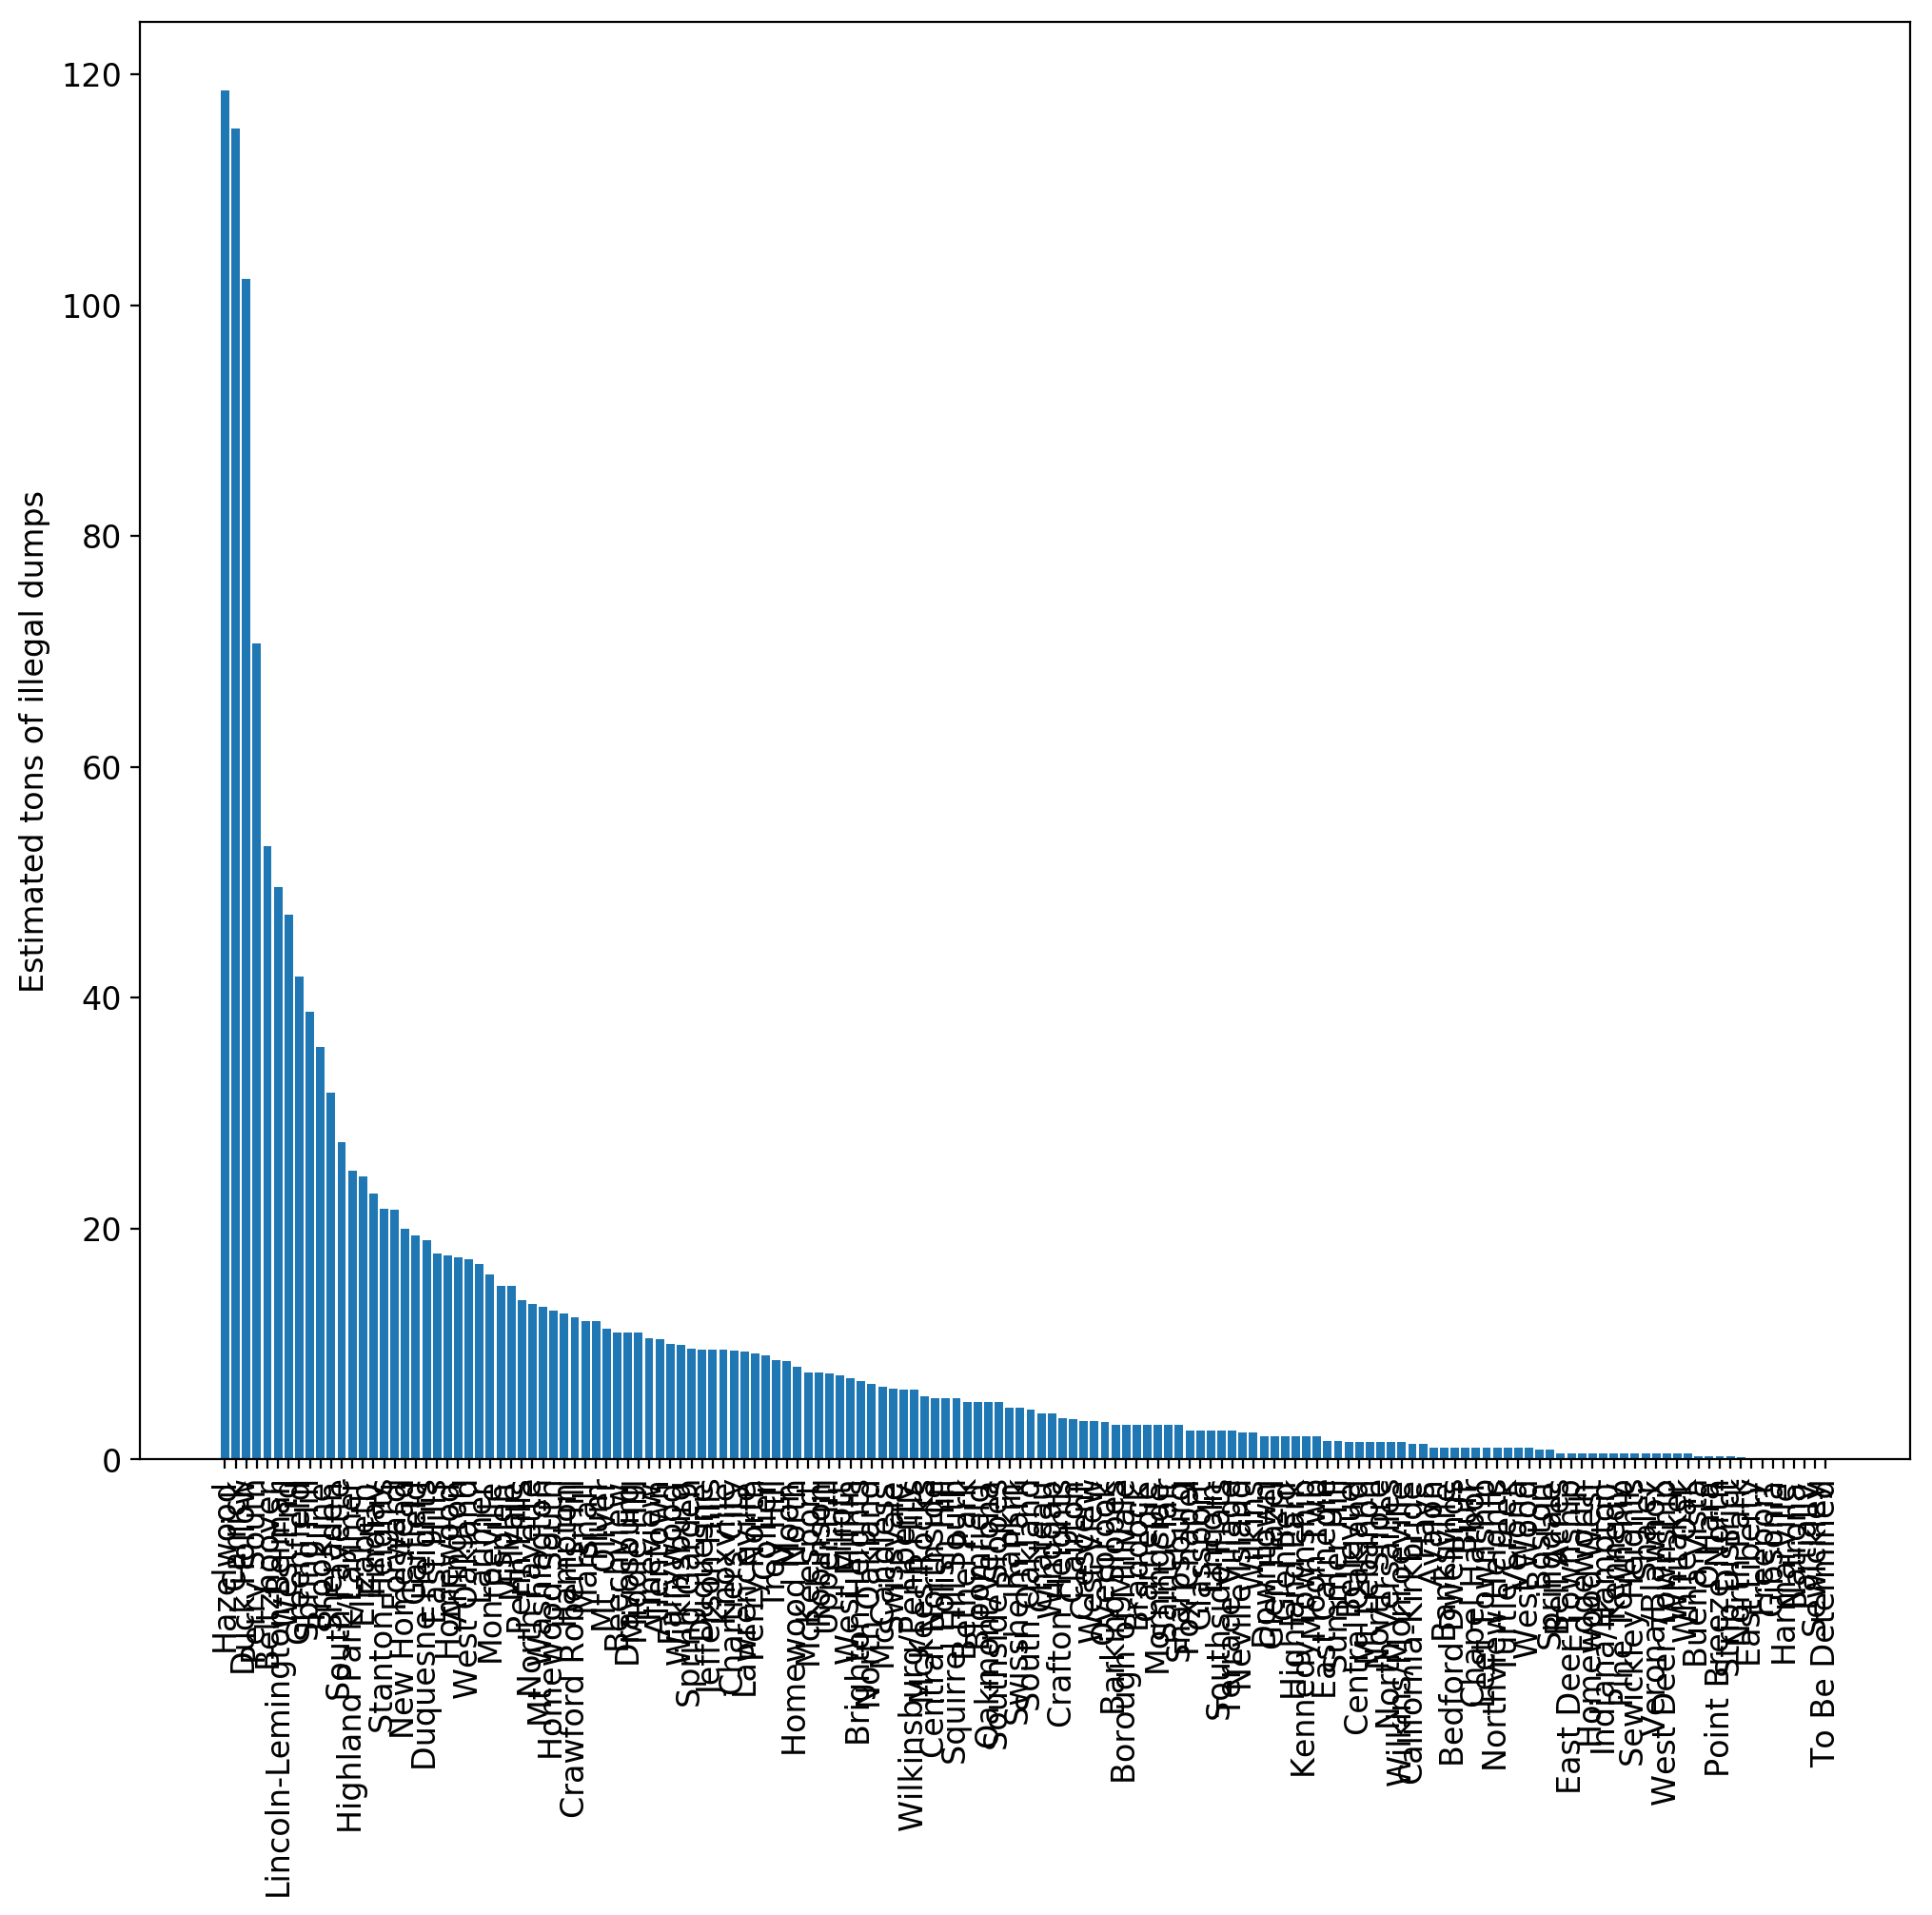

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(num=None, figsize=(12,10), dpi=200, facecolor='w', edgecolor='k')
plt.bar(sortedDumpHoods, [hoodDumpData[x] for x in sortedDumpHoods])
plt.rcParams.update({'font.size': 4})
plt.xticks(rotation=90)
plt.ylabel("Estimated tons of illegal dumps")
plt.show()
plt.clf()

Here we can see the distibution of the estimated tons of illegal dumps. This graph is right skewed. 

In [12]:
maxDumpVal = max([hoodDumpData[x] for x in hoodDumpData])
minDumpVal = min([hoodDumpData[x] for x in hoodDumpData])

normHoodDumpData = {}

for hood in hoodDumpData:
    normalized = (hoodDumpData[hood] - minDumpVal) / (maxDumpVal - minDumpVal)
    normHoodDumpData[hood] = normalized

Again, we normalized each value to be between 0 and 1. The higher the estimated tons of each neighborhood was, the closer it is to 1.

In [13]:
for hood in sortedDumpHoods[:10]:
    print ("{}: {:.4f}".format(hood, normHoodDumpData[hood]))

Hazelwood: 1.0000
Carrick: 0.9722
Duck Hollow: 0.8626
Perry South: 0.5961
Beltzhoover: 0.4477
Lincoln-Lemington-Belmar: 0.4182
West End: 0.3980
Greenfield: 0.3524
Spring Hill: 0.3272
Brookline: 0.3010


Here are the top 10 neighborhoods with the highest amount of illegal dumping. Since this data set was left skewed, the values drop quickly.

Moving on to our trees data. 

In [14]:
treeDataFrame = pd.read_csv("trees.csv", error_bad_lines=False, index_col=False, dtype='unicode')
treeDataFrame.head(5)

id address_number         street         common_name  \
0   754166088           7428  MONTICELLO ST               Stump   
1  1946899269            220     BALVER AVE  Linden: Littleleaf   
2  1431517397           2822      SIDNEY ST          Maple: Red   
3   994063598            608     SUISMON ST      Maple: Freeman   
4  1591838573           1135   N NEGLEY AVE       Maple: Norway   

    scientific_name height width growth_space_length growth_space_width  \
0             Stump      0     0                  10                  2   
1     Tilia cordata      0     0                  99                 99   
2       Acer rubrum     22     6                   6                  3   
3  Acer x freemanii     25    10                   3                  3   
4  Acer platanoides     52    13                  99                 99   

      growth_space_type      ...           neighborhood council_district ward  \
0           Well or Pit      ...         Homewood North                9   13   
1  Open or Unrestricted      ...                Oakwood                2   28   
2           Well or Pit      ...       South Side Flats                3   16   
3           Well or Pit      ...         East Allegheny                1   23   
4  Open or Unrestricted      ...          Highland Park                7   11   

         tract public_works_division pli_division police_zone fire_zone  \
0  42003130200                     2           13           5      3-17   
1  42003562800                     5           28           6      1-19   
2  42003160900                     3           16           3      4-24   
3  42003563200                     1           23           1       1-6   
4  42003110200                     2           11           5       3-9   

      latitude     longitude  
0  40.45816863  -79.88972391  
1  40.42926879  -80.06786821  
2  40.42679667  -79.96503491  
3  40.45550338  -79.99927602  
4  40.47666673  -79.92410638  

[5 rows x 58 columns]

In [15]:
hoodTreeData = {}

groupedTreeDataFrame = treeDataFrame.groupby("neighborhood")["id"].count().to_frame().reset_index()

for x in range(len(groupedTreeDataFrame)):
    hoodTreeData[groupedTreeDataFrame.loc[x, "neighborhood"]] = groupedTreeDataFrame.loc[x, "id"]

print (hoodTreeData)

{'Allegheny Center': 867, 'Allegheny West': 386, 'Allentown': 84, 'Arlington': 107, 'Arlington Heights': 5, 'Banksville': 437, 'Bedford Dwellings': 198, 'Beechview': 611, 'Beltzhoover': 170, 'Bloomfield': 1436, 'Bluff': 222, 'Bon Air': 92, 'Brighton Heights': 910, 'Brookline': 853, 'California-Kirkbride': 94, 'Carrick': 772, 'Central Business District': 1002, 'Central Lawrenceville': 713, 'Central Northside': 674, 'Central Oakland': 368, 'Chartiers City': 37, 'Chateau': 276, 'Crafton Heights': 368, 'Crawford-Roberts': 568, 'Duquesne Heights': 101, 'East Allegheny': 391, 'East Carnegie': 8, 'East Hills': 483, 'East Liberty': 1366, 'Elliott': 171, 'Esplen': 3, 'Fairywood': 31, 'Fineview': 90, 'Friendship': 362, 'Garfield': 626, 'Glen Hazel': 2, 'Greenfield': 745, 'Hays': 1, 'Hazelwood': 574, 'Highland Park': 2941, 'Homewood North': 403, 'Homewood South': 459, 'Homewood West': 92, 'Knoxville': 431, 'Larimer': 306, 'Lincoln Place': 263, 'Lincoln-Lemington-Belmar': 523, 'Lower Lawrenceville

Here we extracted the data needed, the neighborhood and the number of trees per neighborhood, and created a dictionary to hold it. Since each row in the data set corrolates to one tree, we can group by the neighborhood and just count the values which will give us the total number of trees per neighborhood. 

In [16]:
sortedTreeHoods = sorted([x for x in hoodTreeData], key = lambda y:hoodTreeData[y], reverse = True)

for hood in sortedTreeHoods:
    print (f"{hood}: {hoodTreeData[hood]} trees")

Squirrel Hill South: 5073 trees
Highland Park: 2941 trees
Squirrel Hill North: 2079 trees
South Side Flats: 1693 trees
Shadyside: 1558 trees
Bloomfield: 1436 trees
East Liberty: 1366 trees
Point Breeze: 1316 trees
Perry North: 1007 trees
Central Business District: 1002 trees
Brighton Heights: 910 trees
Mount Washington: 874 trees
Allegheny Center: 867 trees
Brookline: 853 trees
North Oakland: 775 trees
Carrick: 772 trees
Greenfield: 745 trees
Central Lawrenceville: 713 trees
Manchester: 707 trees
Stanton Heights: 700 trees
Central Northside: 674 trees
Garfield: 626 trees
Beechview: 611 trees
Hazelwood: 574 trees
Crawford-Roberts: 568 trees
Point Breeze North: 565 trees
Lincoln-Lemington-Belmar: 523 trees
Lower Lawrenceville: 508 trees
Marshall-Shadeland: 488 trees
Strip District: 486 trees
East Hills: 483 trees
Morningside: 461 trees
Homewood South: 459 trees
North Shore: 457 trees
Banksville: 437 trees
Regent Square: 434 trees
Knoxville: 431 trees
Homewood North: 403 trees
Sheraden: 3

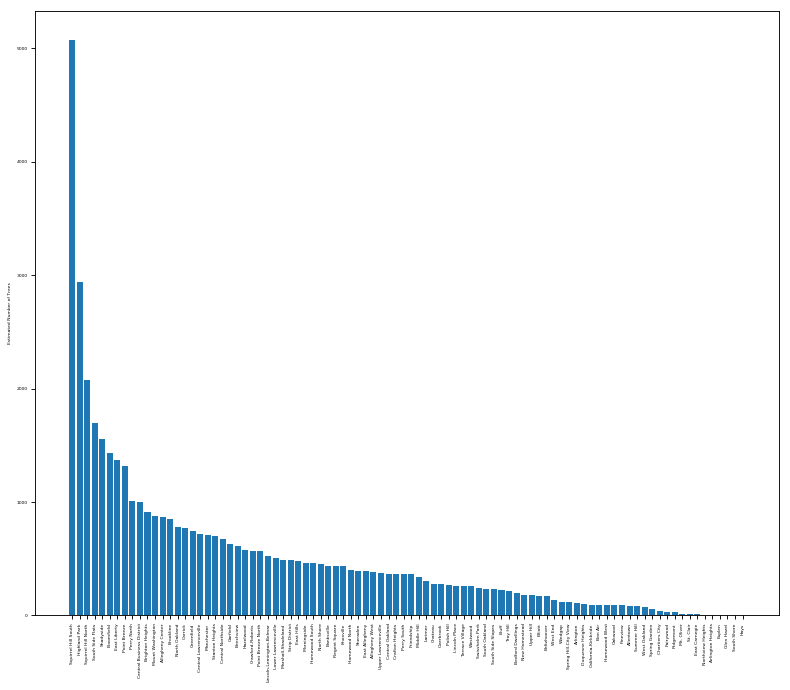

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(sortedTreeHoods, [hoodTreeData[x] for x in sortedTreeHoods])
plt.ylabel("Estimated Number of Trees")
plt.rcParams.update({'font.size': 8})
plt.xticks(rotation=90)
plt.show()
plt.clf()

Here is the distribution of the number of trees in each neighborhood. Again, this data is very right skewed.

In [18]:
maxDumpVal = max([hoodTreeData[x] for x in hoodTreeData])
minDumpVal = min([hoodTreeData[x] for x in hoodTreeData])

normHoodTreeData = {}

for hood in hoodTreeData:
    normalized = (hoodTreeData[hood] - minDumpVal) / (maxDumpVal - minDumpVal)
    normHoodTreeData[hood] = normalized

We normalized the data between 0 and 1 to get the score for each neighborhood. Neighborhoods with the largest number of trees have the highest score.

In [19]:
for hood in sortedTreeHoods[:10]:
    print ("{}: {:.4f}".format(hood, normHoodTreeData[hood]))

Squirrel Hill South: 1.0000
Highland Park: 0.5797
Squirrel Hill North: 0.4097
South Side Flats: 0.3336
Shadyside: 0.3070
Bloomfield: 0.2829
East Liberty: 0.2691
Point Breeze: 0.2593
Perry North: 0.1983
Central Business District: 0.1974


Here are the top 10 neighborhoods with the best tree scores. Since the data is very left skewed, e.g. Squirrel Hill South (1st place) has almost twice as many trees as Highland Park (2nd place).

Now we combine the data to get the final results. 

In [20]:
combinedNormHoodData = normHoodBoomerData.copy()

for hood in normHoodDumpData:
    if hood not in combinedNormHoodData:
        combinedNormHoodData[hood] = normHoodDumpData[hood]
    else:
        combinedNormHoodData[hood] += normHoodDumpData[hood]
        
for hood in normHoodTreeData:
    if hood not in combinedNormHoodData:
        combinedNormHoodData[hood] = normHoodTreeData[hood]
    else:
        combinedNormHoodData[hood] += normHoodTreeData[hood]
        

In [21]:
sortedCombinedNormHoodData = sorted([x for x in combinedNormHoodData], key = lambda y:combinedNormHoodData[y], reverse = True)

for hood in sortedCombinedNormHoodData:
    print (f"{hood}: {combinedNormHoodData[hood]}")

Squirrel Hill South: 1.7681517141322882
Carrick: 1.7666445209947677
Hazelwood: 1.6740266577878706
Perry South: 1.3809718448986756
Lincoln-Lemington-Belmar: 1.2920801806636883
Highland Park: 1.2864605373317326
Squirrel Hill North: 1.1539142021294004
South Side Flats: 1.114521992643523
Shadyside: 1.10426600763845
Brookline: 1.1010758777377756
Beltzhoover: 1.0995591920589964
Greenfield: 1.0980953811139997
Sheraden: 1.0954175884007196
North Oakland: 1.0753255936875283
Central Oakland: 1.0686448647322795
Bluff: 1.0484128777227417
East Liberty: 1.04725708772133
Terrace Village: 1.0440090844707763
Spring Garden: 1.020162467027443
Brighton Heights: 1.006706460763153
Perry North: 1.004965797387285
Arlington Heights: 1.000788643533123
Larimer: 0.9835556316815111
California-Kirkbride: 0.978219762104466
West Oakland: 0.975495184647743
Bloomfield: 0.9599606804155927
Arlington: 0.9501777224280359
Garfield: 0.9380376253342886
Lower Lawrenceville: 0.9299685486693136
Point Breeze: 0.9256671999818731
Kn

The  dictionaries containing the scores for boomers, illegal dumping, and the number of trees were merged. Here is the final score for each neighborhood.

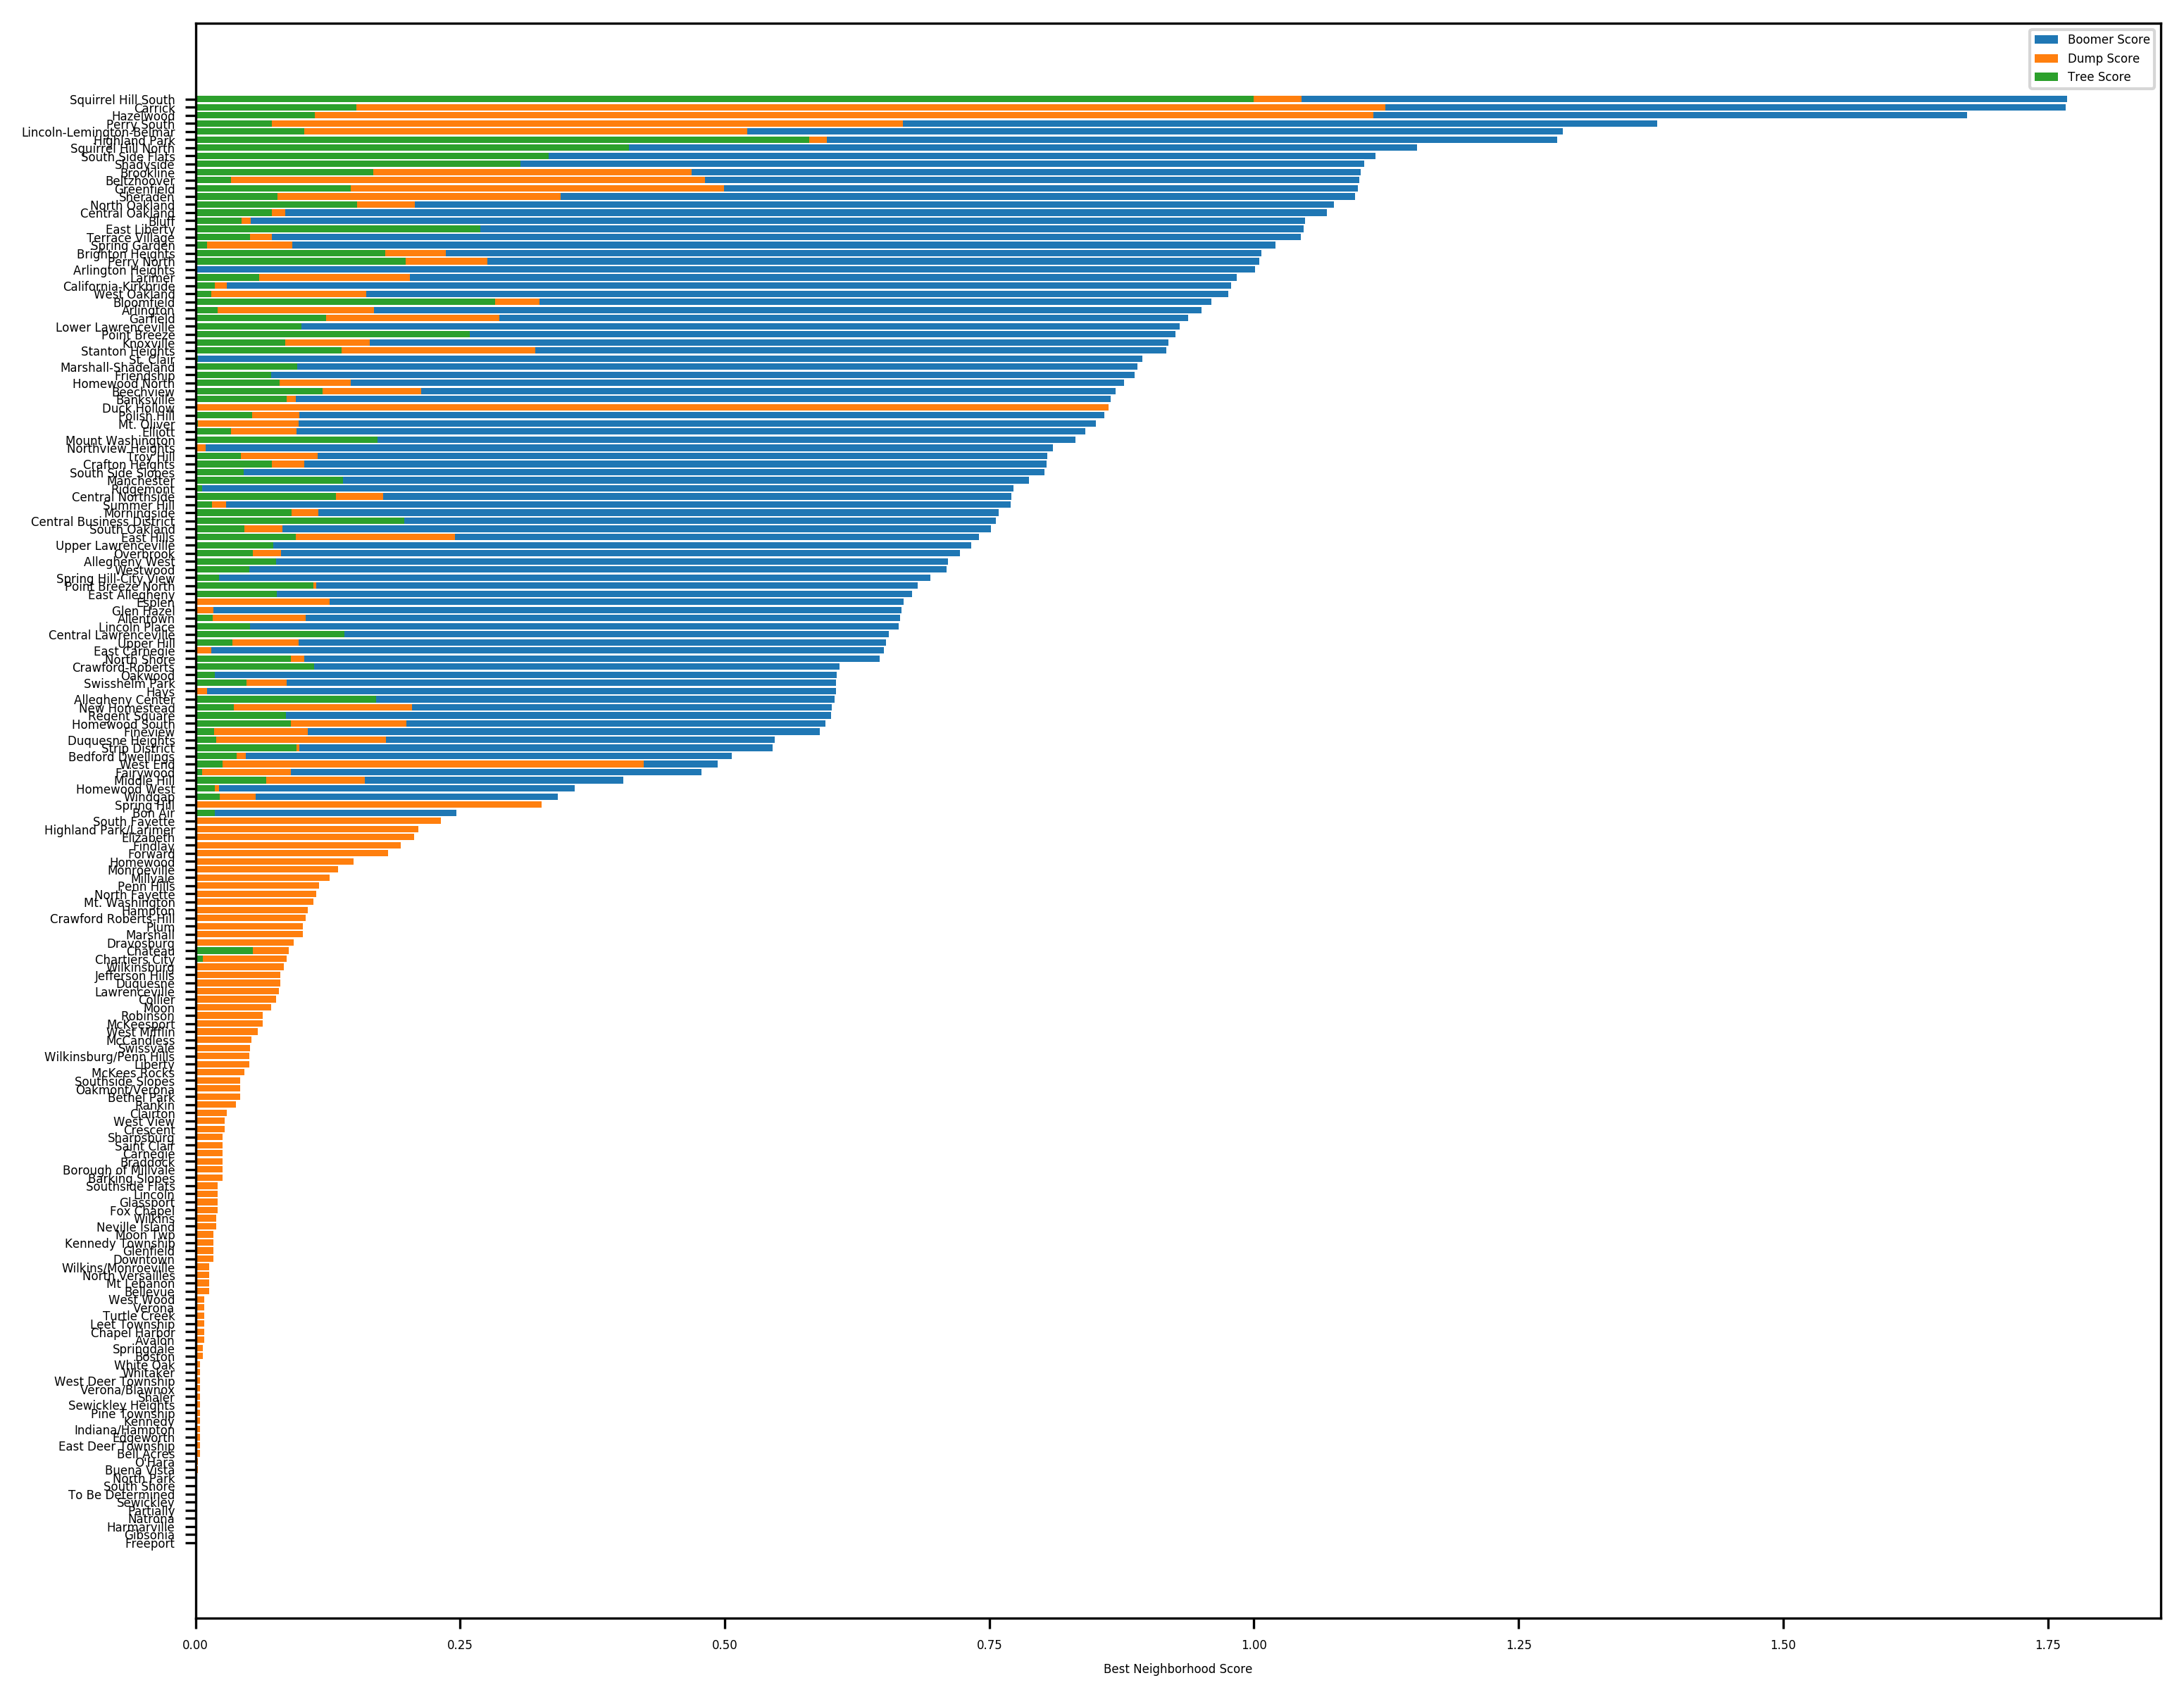

<Figure size 432x288 with 0 Axes>

In [104]:
sortedCombinedHoods = sorted([x for x in combinedNormHoodData], key = lambda y:combinedNormHoodData[y])

normHoodBoomerVals = np.array([normHoodBoomerData[x]  if x in normHoodBoomerData  else 0.0 for x in sortedCombinedHoods])
normHoodDumpVals = np.array([normHoodDumpData[x]  if x in normHoodDumpData else 0.0 for x in sortedCombinedHoods])
normHoodTreeVals = np.array([normHoodTreeData[x]  if x in normHoodTreeData else 0.0 for x in sortedCombinedHoods])

plt.rcParams.update({'font.size': 4})
plt.figure(num=None, figsize=(12,10), dpi=300, facecolor='w', edgecolor='k')
plt.barh(sortedCombinedHoods,normHoodBoomerVals, label = "Boomer Score", left=normHoodDumpVals+normHoodTreeVals)
plt.barh(sortedCombinedHoods,normHoodDumpVals, label = "Dump Score", left=normHoodTreeVals)
plt.barh(sortedCombinedHoods,normHoodTreeVals, label = "Tree Score")
#plt.tick_params(labelleft = False)
plt.xlabel("Best Neighborhood Score")

plt.legend()
plt.show()
plt.clf()

Here is the distribution of the total scores for every neighborhood.

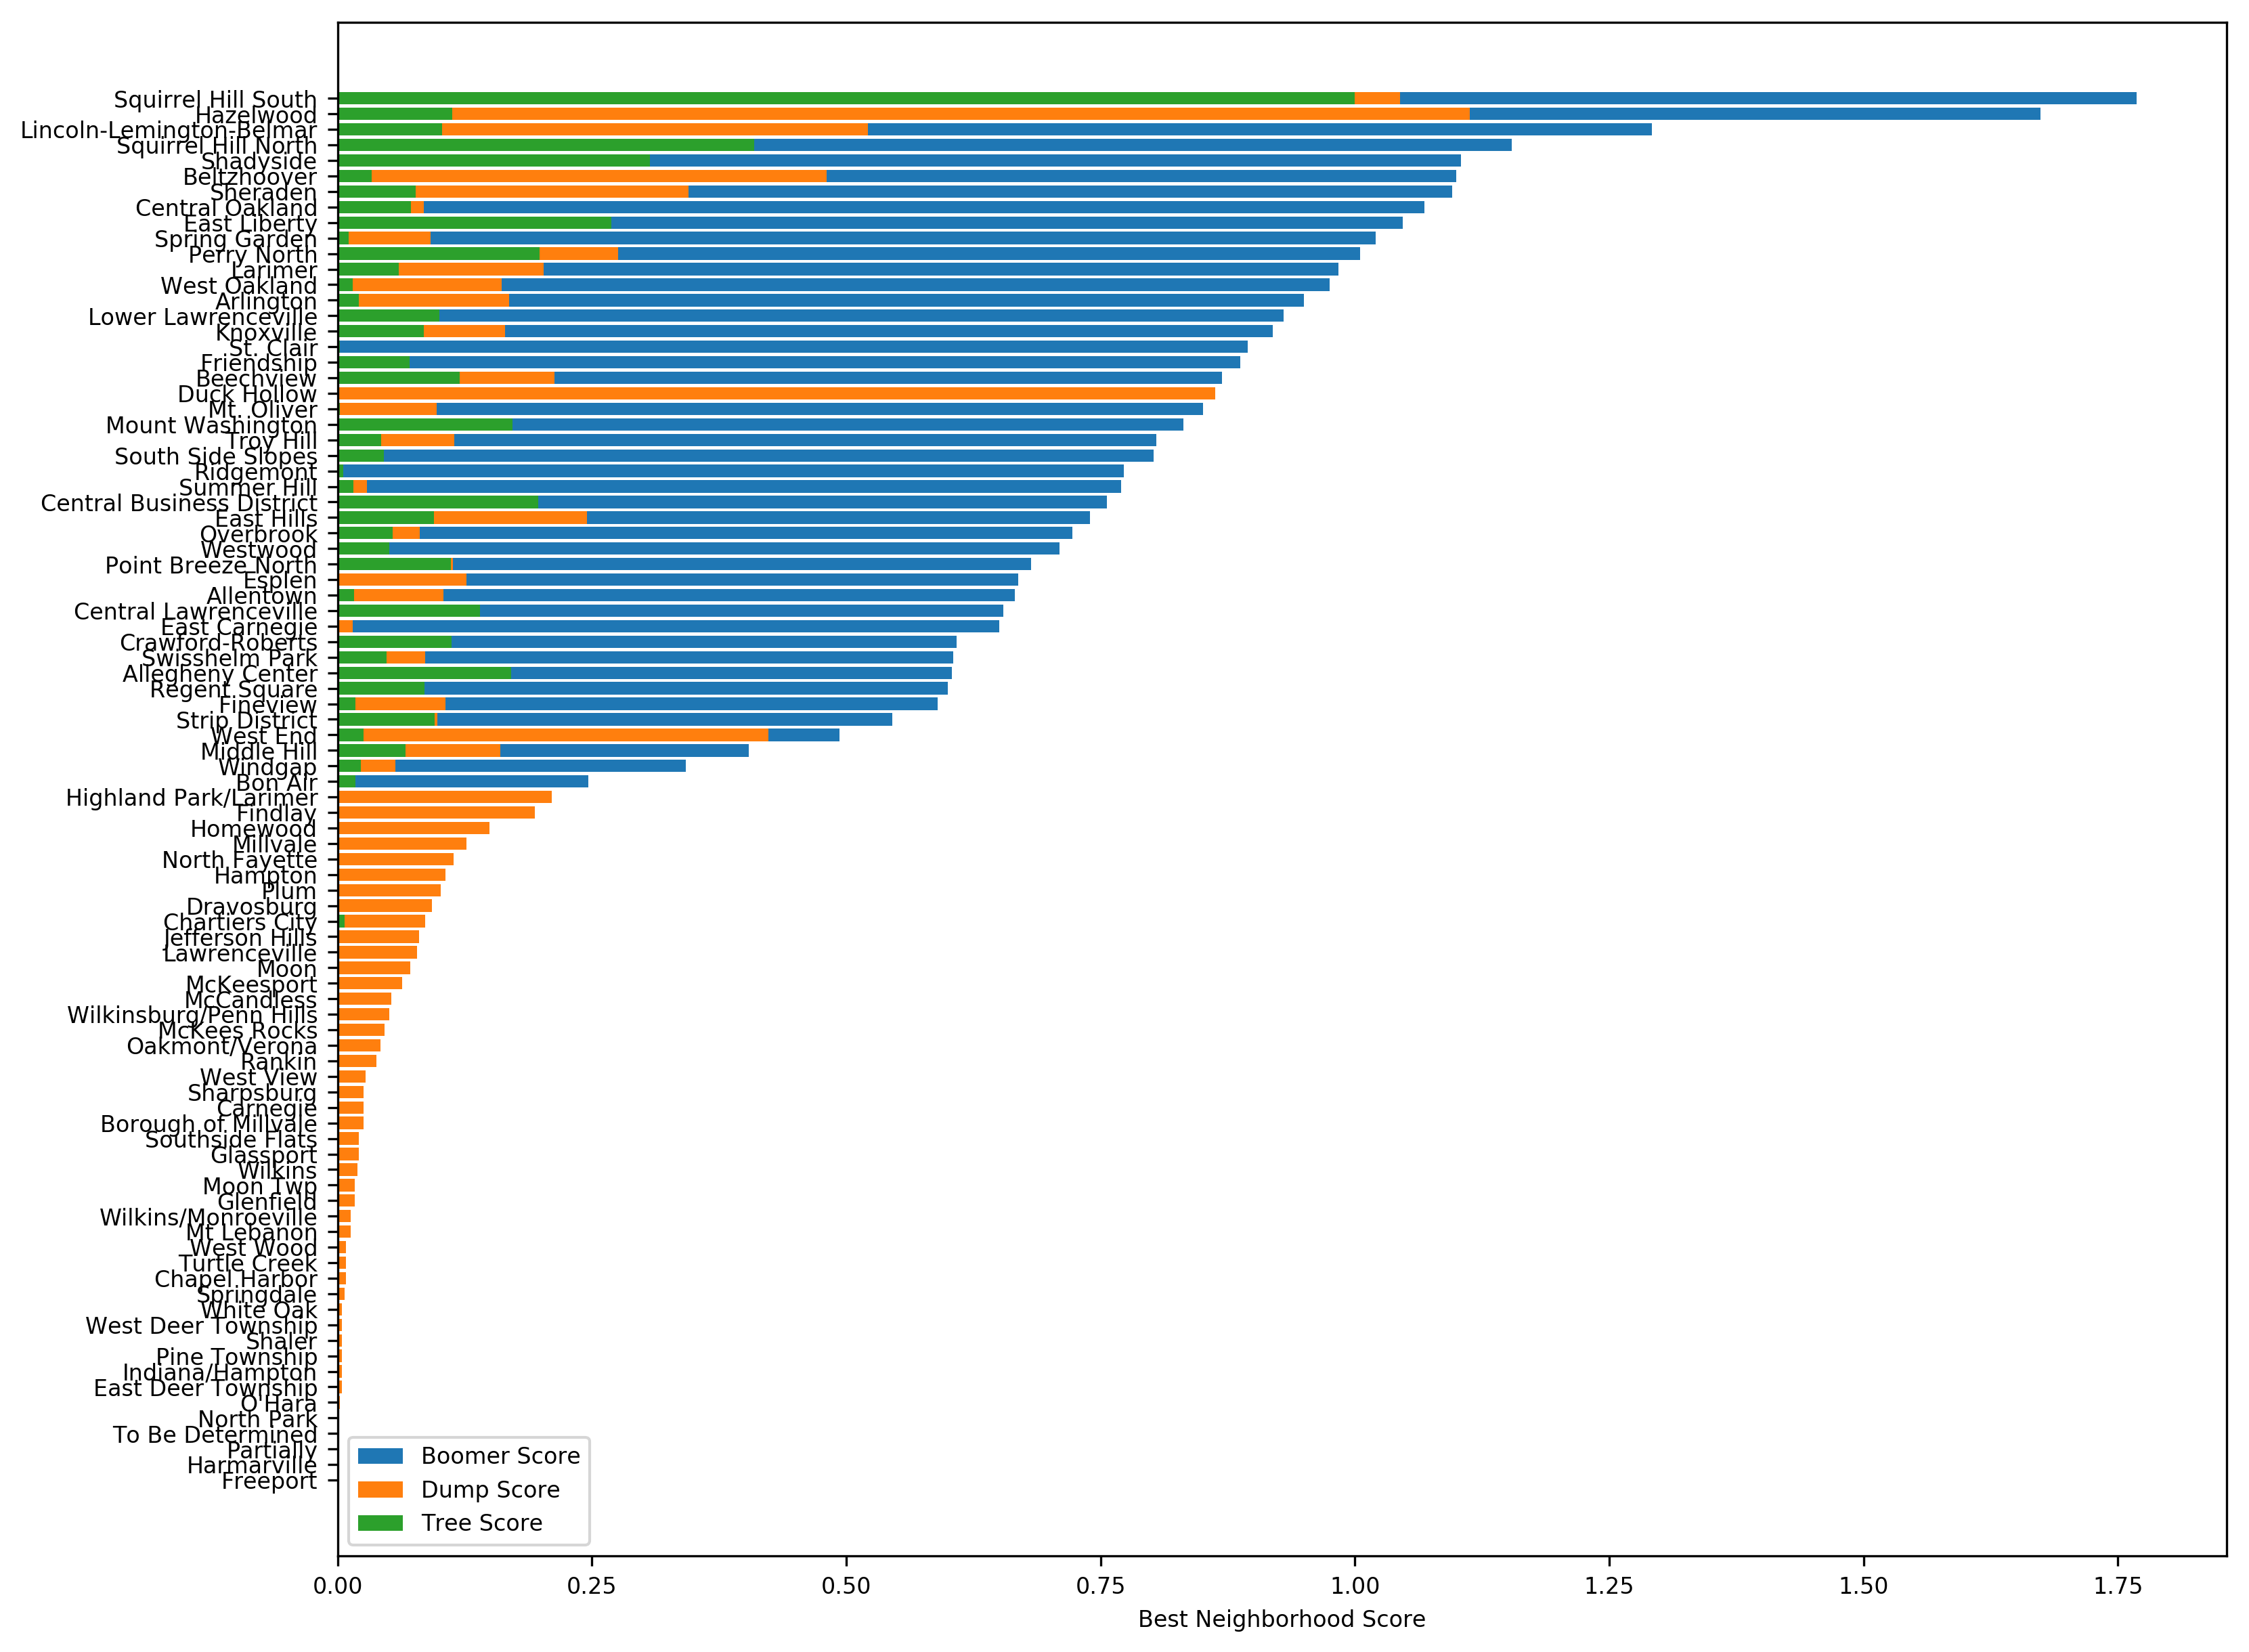

<Figure size 432x288 with 0 Axes>

In [108]:
sortedCombinedHoodsEveryOther = sorted([x for x in combinedNormHoodData], key = lambda y:combinedNormHoodData[y])[::2]

normHoodBoomerVals = np.array([normHoodBoomerData[x]  if x in normHoodBoomerData  else 0.0 for x in sortedCombinedHoodsEveryOther])
normHoodDumpVals = np.array([normHoodDumpData[x]  if x in normHoodDumpData else 0.0 for x in sortedCombinedHoodsEveryOther])
normHoodTreeVals = np.array([normHoodTreeData[x]  if x in normHoodTreeData else 0.0 for x in sortedCombinedHoodsEveryOther])

plt.figure(num=None, figsize=(12,10), dpi=300, facecolor='w', edgecolor='k')
plt.barh(sortedCombinedHoodsEveryOther,normHoodBoomerVals, label = "Boomer Score", left=normHoodDumpVals+normHoodTreeVals)
plt.barh(sortedCombinedHoodsEveryOther,normHoodDumpVals, label = "Dump Score", left=normHoodTreeVals)
plt.barh(sortedCombinedHoodsEveryOther,normHoodTreeVals, label = "Tree Score")
plt.rcParams.update({'font.size': 8})
plt.xlabel("Best Neighborhood Score")
plt.legend()
plt.show()
plt.clf()

Here is a similar graph with only every other neighborhood shown, to get a better idea of how the scores are separated for each neighborhoods.

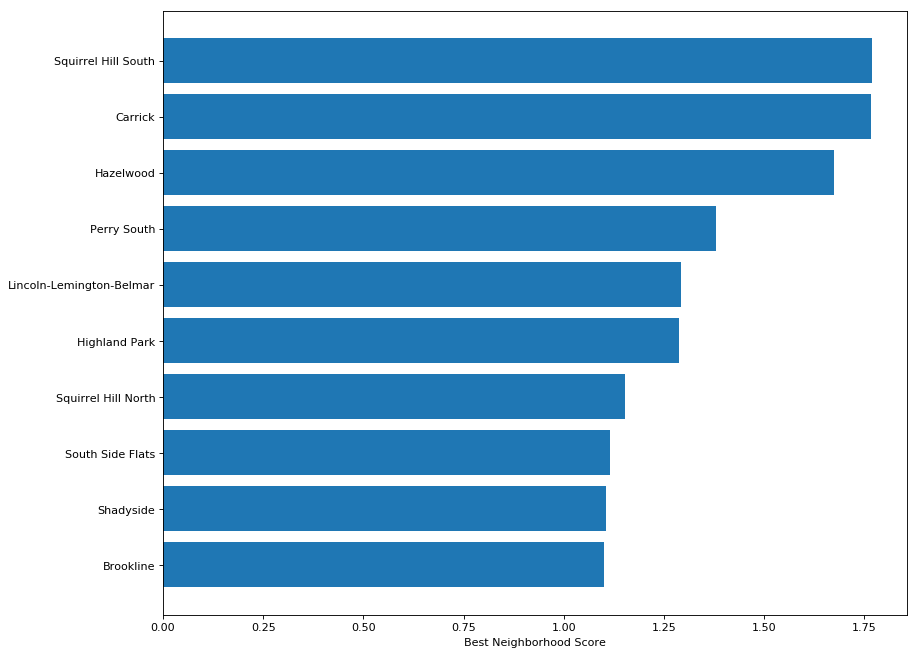

<Figure size 432x288 with 0 Axes>

In [70]:
sortedCombinedHoods = sorted([x for x in combinedNormHoodData], key = lambda y:combinedNormHoodData[y])[-10:]

plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')
plt.barh(sortedCombinedHoods, [combinedNormHoodData[x] for x in sortedCombinedHoods])
plt.xlabel("Best Neighborhood Score")
plt.show()
plt.clf()

Here is a graph of the top 10 neighborhoods with the highest score.

In [60]:
for hood in sortedCombinedHoods[::-1]:
    
    boomerScore = normHoodBoomerData[hood] if hood in normHoodBoomerData else 0.0
    dumpScore = normHoodDumpData[hood] if hood in normHoodDumpData else 0.0 
    treeScore = normHoodTreeData[hood] if hood in normHoodTreeData else 0.0
    
    print ("{}:\n\tboomer score: {:.4f}\n\tdump score:   {:.4f}\n\ttree score:   {:.4f}\n\ttotal score:  {:.4f}".format(hood, boomerScore, dumpScore, treeScore, combinedNormHoodData[hood]))

Squirrel Hill South:
	boomer score: 0.7235
	dump score:   0.0447
	tree score:   1.0000
	total score:  1.7682
Carrick:
	boomer score: 0.6425
	dump score:   0.9722
	tree score:   0.1520
	total score:  1.7666
Hazelwood:
	boomer score: 0.5611
	dump score:   1.0000
	tree score:   0.1130
	total score:  1.6740
Perry South:
	boomer score: 0.7127
	dump score:   0.5961
	tree score:   0.0722
	total score:  1.3810
Lincoln-Lemington-Belmar:
	boomer score: 0.7709
	dump score:   0.4182
	tree score:   0.1029
	total score:  1.2921
Highland Park:
	boomer score: 0.6899
	dump score:   0.0169
	tree score:   0.5797
	total score:  1.2865
Squirrel Hill North:
	boomer score: 0.7442
	dump score:   0.0000
	tree score:   0.4097
	total score:  1.1539
South Side Flats:
	boomer score: 0.7809
	dump score:   0.0000
	tree score:   0.3336
	total score:  1.1145
Shadyside:
	boomer score: 0.7973
	dump score:   0.0000
	tree score:   0.3070
	total score:  1.1043
Brookline:
	boomer score: 0.6321
	dump score:   0.3010
	tree sc

Here are the top 10 best neighborhoods.

According to our metrics, the best neighborhood is Squirrel Hill South. It was a close match, with Squirrel Hill South beating Carrick by 0.0016. Here are it's results:

In [63]:
print (f"Boomer Population Percentage: {hoodBoomerData['Squirrel Hill South']}%")
print ("Boomer Population Score: {:.4f}".format(normHoodBoomerData['Squirrel Hill South']))
print (f"Estimated Tons of Illegal Dumps: {hoodDumpData['Squirrel Hill South']}")
print ("Dump Score: {:.4f}".format(normHoodDumpData['Squirrel Hill South']))
print (f"Estimated Number of Trees: {hoodTreeData['Squirrel Hill South']}")
print ("Tree Count Score: {:.4f}".format(normHoodTreeData['Squirrel Hill South']))
print ("Total Score: {:.4f}".format(combinedNormHoodData['Squirrel Hill South']))

Boomer Population Percentage: 10.34%
Boomer Population Score: 0.7235
Estimated Tons of Illegal Dumps: 5.3
Dump Score: 0.0447
Estimated Number of Trees: 5073
Tree Count Score: 1.0000
Total Score: 1.7682


## Conclusions

## Sean

Not being from Pittsburgh, most of the neighborhoods don't really mean anything to me. My favorite neighborhood is by default, Oakland. Since it was separated into Central, West, North, and South Oakland, it really didn't appear on the final results. I'm sure if those values were all combined, it would. Especially since Central Oakland was 3rd for the boomer score. I did notice a trend while watching other presentations that Squirrel Hill South was "the best" in the majority of them. I assume if I had lived here for my entire life or at least more than just three months, I would expect that to be the case.